In [134]:
import os 
import sys
import importlib
sys.path.append(os.path.join(os.path.dirname('ea1'), 'src'))
import genetic_algorithm
importlib.reload(genetic_algorithm)
from genetic_algorithm import GeneticAlgorithm

import matplotlib.pyplot as plt
import numpy as np
import random

In [135]:
def seed_everything(seed: int=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [ ]:
def plot_fitness_history(fitness_history, title="Fitness over generations", label=None, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    plt.plot(fitness_history, label=label or "Best fitness", color="blue")
    plt.xlabel("Generations")
    plt.ylabel("Best fitness")
    plt.title(title)
    if label:
        plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [162]:
def plot_fitness_histories(experiment_results, parameter_name="Population size",
                          title="Convergence of GA for different {parameter_name}", figsize=(6, 4)):
    plt.figure(figsize=figsize)
    colors = plt.cm.viridis(np.linspace(0, 1, len(experiment_results)))
    
    for i, (param_value, history) in enumerate(experiment_results):
        label = f"{parameter_name} {param_value} (Best: {min(history):.4f})"
        plt.plot(history, label=label, color=colors[i])

    plt.xlabel("Generations")
    plt.ylabel("Best fitness value")
    plt.title(title.format(parameter_name=parameter_name))
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### $$f(x, y, z) = x^2 + y^2 + 2z^2$$

In [136]:
def test_function(individual):
    x, y, z = individual
    return (x**2 + y**2 + 2*(z**2))

In [146]:
ga=GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                        mutation_rate=0.1, crossover_rate=0.7, generations=10000)

In [147]:
best_solution, best_fitness, fitness_history = ga.run(eval_every=1000, early_stopping=True, patience=3000)
print("\nOptimal solution:", best_solution)
print("Objective function value:", best_fitness)
print("Theoretical minimum (for x=0, y=0, z=0):", (0**2 + 0**2 + 2*((0)**2)))

Generation 1000/10000, Best Fitness: 0.0027378387746966534, Best Individual: [-0.00036166  0.04026005  0.02363087]
Generation 2000/10000, Best Fitness: 0.0027378387746966534, Best Individual: [-0.00036166  0.04026005  0.02363087]
Generation 3000/10000, Best Fitness: 5.1397374240763585e-05, Best Individual: [-0.00036166  0.0028963   0.00463023]
Generation 4000/10000, Best Fitness: 5.1283542136215325e-05, Best Individual: [0.00013026 0.0028963  0.00463023]
Generation 5000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Generation 6000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Generation 7000/10000, Best Fitness: 5.128113151808995e-05, Best Individual: [0.00012066 0.0028963  0.00463023]
Early stopping at generation 7569 — no improvement in 3000 generations.

Optimal solution: [0.00012066 0.0028963  0.00463023]
Objective function value: 5.128113151808995e-05
Theoretical minimum (for x=0, y

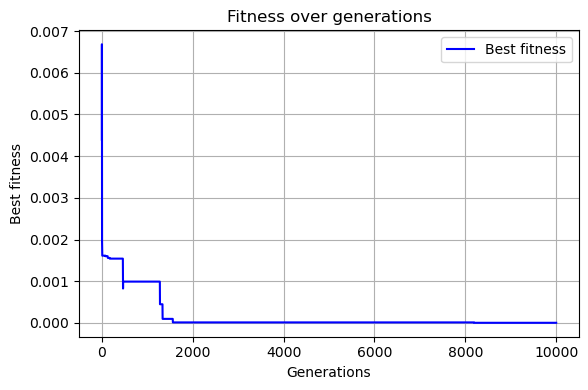

In [154]:
plot_fitness_history(fitness_history, title="Fitness over generations", label="Best fitness")

#### Experiments

To ensure reproducibility, I am setting a random seed while experimenting with different parameters for the algorithm.

population size

In [150]:
population_sizes = [50, 100, 200, 500, 1000]
results = []
fitness_histories = []

for pop_size in population_sizes:
    seed_everything(42)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=3, population_size=pop_size, fitness_function=test_function, 
                          mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    
    results.append((pop_size, best_fitness, best_solution))
    fitness_histories.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 0.0007896556727387932, Best Individual: [ 0.00012674 -0.01358992 -0.01739186]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 5.087365237042486e-05, Best Individual: [ 1.87336722e-05 -6.92115539e-03 -1.21879232e-03]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 1.1351769653186386e-05, Best Individual: [-4.98634914e-05 -3.21772599e-03 -7.05522060e-04]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 4.427602388867184e-06, Best Individual: [ 1.09937760e-05 -7.27012803e-05 -1.48697613e-03]


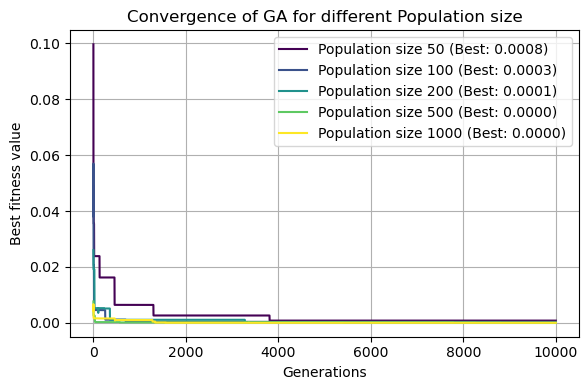

In [155]:
plot_fitness_histories(fitness_histories, parameter_name="Population size")

mutation rate

In [158]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
results = []
mutation_history = []
for mutation_rate in mutation_rates:
    seed_everything(42)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((mutation_rate, best_fitness, best_solution))
    mutation_history.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 0.0032419690176351532, Best Individual: [-0.00171674  0.01212026 -0.03931998]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.0005173489393553987, Best Individual: [-0.0004409  -0.015362    0.01185672]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 9.783881501687768e-05, Best Individual: [ 7.40579300e-06 -2.39098488e-03  6.78682369e-03]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.00012397423401138715, Best Individual: [-0.00618882  0.00884623 -0.00192575]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 0.0008977441732968233, Best Individual: [0.01667504 0.00110975 0.01758487]


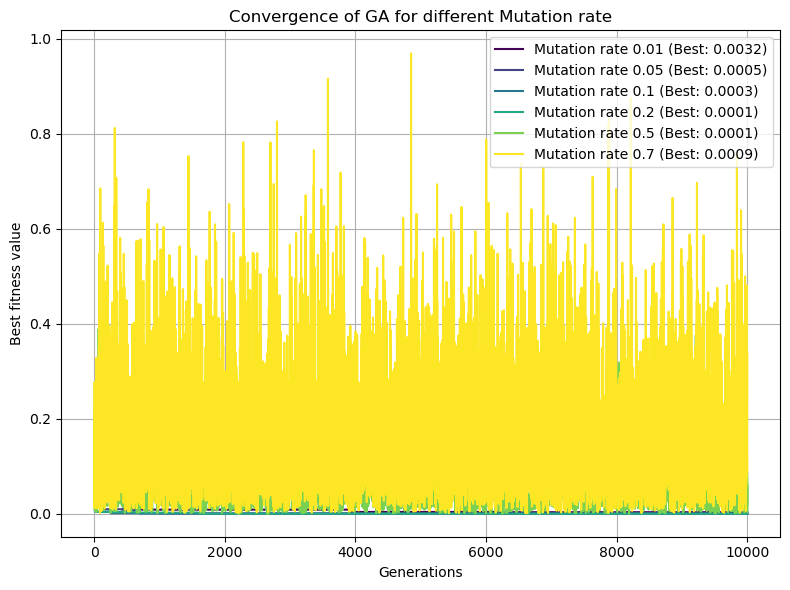

In [163]:
plot_fitness_histories(mutation_history, parameter_name="Mutation rate", figsize=(8, 6))

crossover rate

In [164]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
results = []
crossover_histories = []
for crossover_rate in crossover_rates:
    seed_everything(42)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=3, population_size=100, fitness_function=test_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 0.00021137578385876726, Best Individual: [-0.00830662 -0.01076561 -0.00363851]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 3.103476694766692e-05, Best Individual: [2.33431851e-05 7.90963003e-04 3.89926913e-03]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 1.5925338565372624e-05, Best Individual: [ 5.85243862e-05 -3.98895715e-03  7.11839352e-05]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 4.9758831170035854e-05, Best Individual: [2.14164453e-05 4.66926333e-03 3.73873992e-03]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.0003438460514719925, Best Individual: [-8.74747071e-05 -1.81706015e-02  2.61415764e-03]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.00018650548821132028, Best Individual: [-2.75362871e-05  1.35207976e-02 -1.35881594e-03]
Running GA with crossover rate

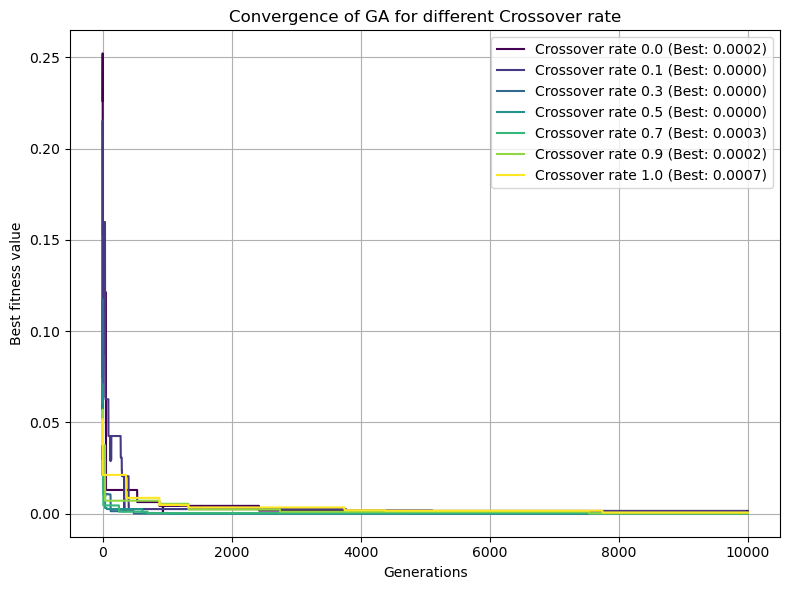

In [165]:
plot_fitness_histories(crossover_histories, parameter_name="Crossover rate", figsize=(8, 6))

### Rastrigin function

$$
f(x_1, x_2, x_3, x_4, x_5) = 10 \cdot 5 + \sum_{i=1}^{5} \left(x_i^2 - 10 \cdot \cos(2\pi x_i)\right)
$$

where \( A = 10 \) by default.

In [166]:
def rastrigin_function(individual):
    return 10 * len(individual) + sum([(x**2 - 10 * np.cos(2 * np.pi * x)) for x in individual])

In [167]:
ga_rastigin=GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                         mutation_rate=0.1, crossover_rate=0.7, generations=10000)

In [168]:
best_solution, best_fitness, history = ga_rastigin.run(eval_every=1000, early_stopping=True, patience=3000)

print("\nOptimal solution:", best_solution)
print("Objective function value:", best_fitness)

A, n= 10, 5
x = np.zeros(n)
theoretical_min = A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))
print("Theoretical minimum (for x1,...,x5 = 0):", theoretical_min)

Generation 1000/10000, Best Fitness: 1.4051425602091143, Best Individual: [ 0.00181723  0.03906227  0.00198084 -1.01769228 -0.00505953]
Generation 2000/10000, Best Fitness: 1.1459818561963004, Best Individual: [0.00181723 0.03906227 0.00198084 0.03976912 0.0519736 ]
Generation 3000/10000, Best Fitness: 1.1458791508073176, Best Individual: [0.00166871 0.03906227 0.00198084 0.03976912 0.0519736 ]
Generation 4000/10000, Best Fitness: 0.8785034388191377, Best Individual: [ 0.00166871 -0.0130628   0.00198084  0.03976912  0.0519736 ]
Generation 5000/10000, Best Fitness: 0.49297475396848256, Best Individual: [ 0.00143888 -0.0130628   0.00198084  0.0196377   0.04399309]
Generation 6000/10000, Best Fitness: 0.23067265777249446, Best Individual: [ 0.00143888 -0.0130628   0.00198084  0.00885754  0.03017366]
Generation 7000/10000, Best Fitness: 0.06714735785847381, Best Individual: [ 0.00143888 -0.0130628   0.00198084 -0.00952845  0.00843651]
Generation 8000/10000, Best Fitness: 0.0667628537714151

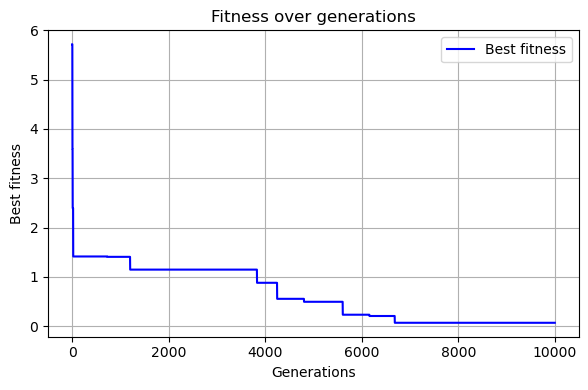

In [169]:
plot_fitness_history(history, title="Fitness over generations", label="Best fitness")

trying more generations

In [170]:
best_solution, best_fitness, fitness_history = ga_rastigin.run(eval_every=1000, early_stopping=True, patience=3000)

Generation 1000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Generation 2000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Generation 3000/10000, Best Fitness: 0.0667371838852091, Best Individual: [-5.36770378e-05 -1.30627979e-02  1.98084370e-03 -9.52844647e-03
  8.43650652e-03]
Early stopping at generation 3001 — no improvement in 3000 generations.


#### Experiments

population size

In [177]:
population_sizes = [50, 100, 200, 500, 1000]
results = []
pop_history_r=[]
for pop_size in population_sizes:
    seed_everything(42)
    print(f"Running GA with population size: {pop_size}")
    ga = GeneticAlgorithm(dimension=5, population_size=pop_size, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((pop_size, best_fitness, best_solution))
    pop_history_r.append((pop_size, fitness_history))

Running GA with population size: 50
Generation 10000/10000, Best Fitness: 0.35220082596435986, Best Individual: [-0.00047362 -0.001139   -0.0111042  -0.03714385  0.01665253]
Running GA with population size: 100
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with population size: 200
Generation 10000/10000, Best Fitness: 0.08548368645244153, Best Individual: [ 0.00014704  0.01135364 -0.00311862 -0.01617498  0.00555713]
Running GA with population size: 500
Generation 10000/10000, Best Fitness: 0.031100271433899707, Best Individual: [-2.75275128e-05  3.72309284e-03  5.52211712e-03 -6.30523544e-03
 -8.52501233e-03]
Running GA with population size: 1000
Generation 10000/10000, Best Fitness: 0.008495715146665361, Best Individual: [-5.15938687e-06 -1.70468188e-03 -4.36209642e-03 -4.55883851e-03
 -3.29573293e-04]


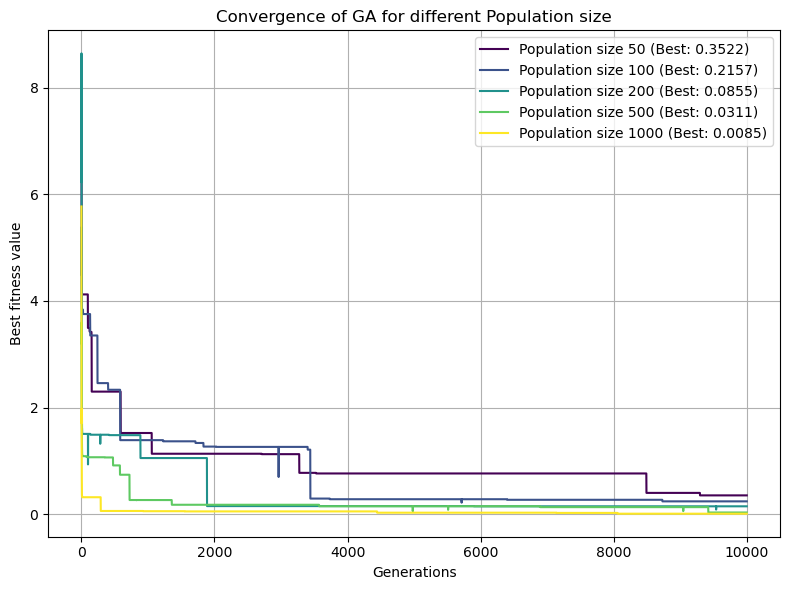

In [178]:
plot_fitness_histories(pop_history_r, parameter_name="Population size", figsize=(8, 6))

mutation rates

In [183]:
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7]
results = []
mutation_history_r=[]
for mutation_rate in mutation_rates:
    seed_everything(42)
    print(f"Running GA with mutation rate: {mutation_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=100, fitness_function=rastrigin_function, 
                               mutation_rate=mutation_rate, crossover_rate=0.7, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((mutation_rate, best_fitness, best_solution))
    mutation_history_r.append((mutation_rate, fitness_history))

Running GA with mutation rate: 0.01
Generation 10000/10000, Best Fitness: 2.0105875741078165, Best Individual: [-7.64305865e-05  1.82218257e-02  1.08376515e-02  6.43044854e-02
  9.70602788e-01]
Running GA with mutation rate: 0.05
Generation 10000/10000, Best Fitness: 0.5174033169793617, Best Individual: [ 5.78314000e-05  1.13536448e-02  1.08376515e-02 -1.89238032e-02
 -4.49145259e-02]
Running GA with mutation rate: 0.1
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with mutation rate: 0.2
Generation 10000/10000, Best Fitness: 0.015807513233070836, Best Individual: [ 0.00024334  0.00035647  0.00269975  0.00310596 -0.00791009]
Running GA with mutation rate: 0.5
Generation 10000/10000, Best Fitness: 0.30095738791837334, Best Individual: [ 0.00117066 -0.00589159 -0.01017419  0.0205114  -0.03098875]
Running GA with mutation rate: 0.7
Generation 10000/10000, Best Fitness: 2.0471498713228584,

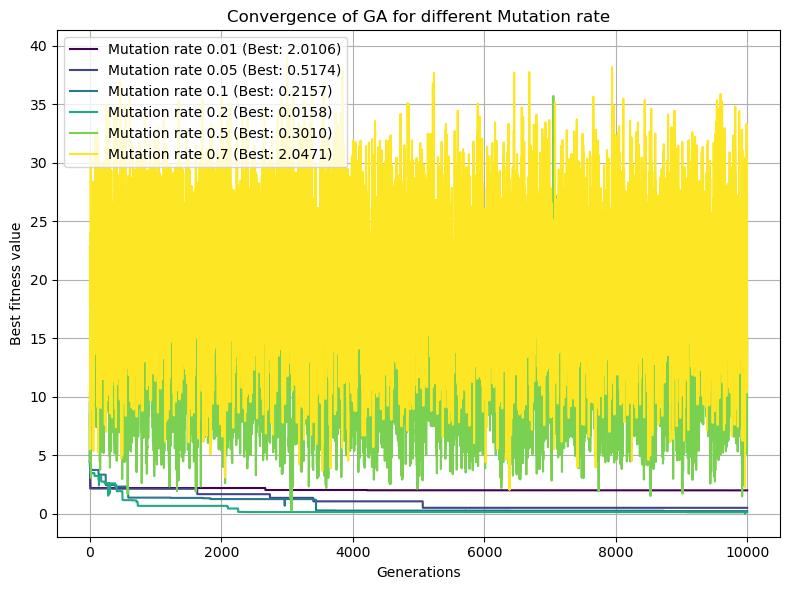

In [184]:
plot_fitness_histories(mutation_history_r, parameter_name="Mutation rate", figsize=(8, 6))

crossover rates

In [ ]:
crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
results = []
crossover_histories_r=[]
for crossover_rate in crossover_rates:
    seed_everything(42)
    print(f"Running GA with crossover rate: {crossover_rate}")
    ga = GeneticAlgorithm(dimension=5, population_size=500, fitness_function=rastrigin_function, 
                               mutation_rate=0.1, crossover_rate=crossover_rate, generations=10000)
    best_solution, best_fitness, fitness_history = ga.run(eval_every=10000, early_stopping=False)
    results.append((crossover_rate, best_fitness, best_solution))
    crossover_histories_r.append((crossover_rate, fitness_history))

Running GA with crossover rate: 0.0
Generation 10000/10000, Best Fitness: 2.84380692675969, Best Individual: [-0.0101605  -0.90835447 -0.02733583  0.0194917   0.02865704]
Running GA with crossover rate: 0.1
Generation 10000/10000, Best Fitness: 1.3300797692364839, Best Individual: [ 0.00311583  0.02102224 -0.05178543 -0.01875979 -0.05725844]
Running GA with crossover rate: 0.3
Generation 10000/10000, Best Fitness: 0.04417254932053538, Best Individual: [0.00266734 0.00352447 0.00172624 0.01412259 0.00090542]
Running GA with crossover rate: 0.5
Generation 10000/10000, Best Fitness: 0.10187098391629945, Best Individual: [-0.00065762  0.00395546  0.01083765  0.01917681 -0.00356218]
Running GA with crossover rate: 0.7
Generation 10000/10000, Best Fitness: 0.21565557622282228, Best Individual: [ 0.00053376 -0.00610267  0.00612128  0.02777378  0.01558154]
Running GA with crossover rate: 0.9
Generation 10000/10000, Best Fitness: 0.4236982086359191, Best Individual: [-0.00147219 -0.01134947  0.

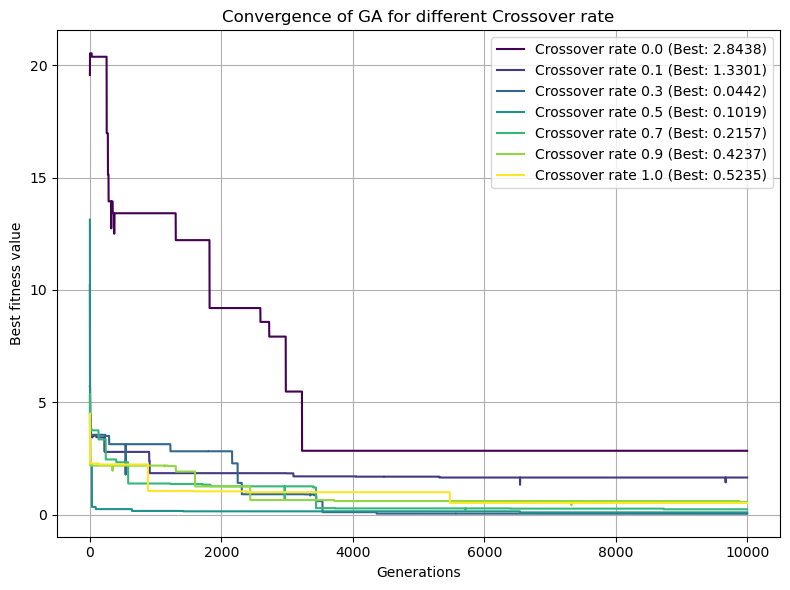

In [ ]:
plot_fitness_histories(crossover_histories_r, parameter_name="Crossover rate", figsize=(8, 6))